In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
df = pd.read_csv('transactions_dataset.csv', sep=";")

In [4]:
df.drop_duplicates()

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
0,2017-09-25,2017-09-25,2376333,188502,155.44320,3,online,2732
1,2017-09-25,2017-09-25,2520527,835089,16.39440,3,at the store,10279
2,2017-09-25,2017-09-25,2536756,1977896,365.76624,21,online,6184
3,2017-09-25,2017-09-25,3028673,598816,8.59878,201,at the store,4200
4,2017-09-25,2017-09-25,203377,2086861,1093.37400,3,by phone,7051
...,...,...,...,...,...,...,...,...
63319310,2019-06-10,2020-06-12,1596284,245272,-2056.91300,5,by phone,7682
63319311,2018-12-14,2020-07-15,908253,880496,27.62760,1001,by phone,9375
63319312,2019-07-26,2020-10-29,1168247,2063314,-204.60984,101,by phone,3014
63319313,2018-05-23,2020-11-27,2319965,1287654,70.49730,17,by phone,1015


In [5]:
df = df.drop(['date_invoice'],axis=1)

In [6]:
df.head()

,date_order,product_id,client_id,sales_net,quantity,order_channel,branch_id
0,2017-09-25,2376333,188502,155.44320,3,online,2732
1,2017-09-25,2520527,835089,16.39440,3,at the store,10279
2,2017-09-25,2536756,1977896,365.76624,21,online,6184
3,2017-09-25,3028673,598816,8.59878,201,at the store,4200
4,2017-09-25,203377,2086861,1093.37400,3,by phone,7051


In [7]:
#will not be used in our analysis
df = df.drop(['sales_net'],axis=1)
df = df.drop(['order_channel'],axis=1)
df = df.drop(['client_id'],axis=1)
df = df.drop(['branch_id'],axis=1)


In [8]:
df.head()

,date_order,product_id,quantity
0,2017-09-25,2376333,3
1,2017-09-25,2520527,3
2,2017-09-25,2536756,21
3,2017-09-25,3028673,201
4,2017-09-25,203377,3


In [36]:
df1 = pd.read_csv('product_clustering_1_scored.csv', sep=",")

In [37]:
df1.head()

,product_id,Recency,Monetary,lifespam,clv,clv_Tile,Rec_Tile,Mone_Tile,lifespam_Tile,score_v1,score,score_level,cluster_labels
0,23,563,613,45,612,4,1,4,3,4143,12,Loyal,Standard Products
1,39,166,197,0,197,2,3,2,1,2321,8,Regular,Churned Products
2,45,296,59,0,59,1,2,1,1,1211,5,Churned,Churned Products
3,48,467,391,0,391,3,1,3,1,3131,8,Regular,Standard Products
4,96,418,191,0,191,2,2,2,1,2221,7,Churned,Standard Products


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355942 entries, 0 to 355941
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   product_id      355942 non-null  int64 
 1   Recency         355942 non-null  int64 
 2   Monetary        355942 non-null  int64 
 3   lifespam        355942 non-null  int64 
 4   clv             355942 non-null  int64 
 5   clv_Tile        355942 non-null  int64 
 6   Rec_Tile        355942 non-null  int64 
 7   Mone_Tile       355942 non-null  int64 
 8   lifespam_Tile   355942 non-null  int64 
 9   score_v1        355942 non-null  int64 
 10  score           355942 non-null  int64 
 11  score_level     355942 non-null  object
 12  cluster_labels  355942 non-null  object
dtypes: int64(11), object(2)
memory usage: 35.3+ MB


In [39]:
df_0 = pd.get_dummies(df1["cluster_labels"])

In [42]:
df_0

,Churned Products,High Value Products,Standard Products
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
355937,0,0,1
355938,0,0,1
355939,0,0,1
355940,0,0,1


In [43]:
df1 = df1.drop(labels= "cluster_labels", axis = 1)

In [44]:
df1 = df1.drop(labels= "product_id", axis = 1)

In [45]:
df1 = df1.drop(labels= ["clv_Tile", "Rec_Tile","Mone_Tile","lifespam_Tile","score_v1"],  axis = 1)

In [46]:
df_0.head()

,Churned Products,High Value Products,Standard Products
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1


In [47]:
df_0.info

<bound method DataFrame.info of         Churned Products  High Value Products  Standard Products
0                      0                    0                  1
1                      1                    0                  0
2                      1                    0                  0
3                      0                    0                  1
4                      0                    0                  1
...                  ...                  ...                ...
355937                 0                    0                  1
355938                 0                    0                  1
355939                 0                    0                  1
355940                 0                    0                  1
355941                 0                    0                  1

[355942 rows x 3 columns]>

In [57]:
df_0 = df_0.drop(labels= ["High Value Products", "Standard Products"],  axis = 1)

In [58]:
 new_df_train = df_0.join(df1, lsuffix="_left", rsuffix="_right")

In [59]:
 new_df_train.head()

,Churned Products,Recency,Monetary,lifespam,clv,score,score_level
0,0,563,613,45,612,12,Loyal
1,1,166,197,0,197,8,Regular
2,1,296,59,0,59,5,Churned
3,0,467,391,0,391,8,Regular
4,0,418,191,0,191,7,Churned


In [60]:
import matplotlib.pyplot as plt
from  sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [61]:
x = new_df_train.iloc[:, :-1]
y = new_df_train['Churned Products']

#categorical_columns = list(x.select_dtypes(include='object').columns)
numeric_columns = list(x.select_dtypes(exclude='object').columns)

In [62]:
from sklearn.model_selection import train_test_split

data_splits = train_test_split(x, y, test_size=0.20, random_state=0,
                               shuffle=True, stratify=y)
x_train, x_test, y_train, y_test = data_splits


# For CatBoost and Naive Bayes
data_splits = train_test_split(x, y, test_size=0.20, random_state=0,
                               shuffle=True, stratify=y)
x_train_cat, x_test_cat, y_train_cat, y_test_cat = data_splits


# Save the non-scaled version of monthlycharges and totalcharges to compare classifiers
#x_test_charges = np.array(x_test[['monthlycharges', 'totalcharges']], copy=True)

list(map(lambda x: x.shape, [x, y, x_train, x_test, y_train, y_test]))

[(355942, 6), (355942,), (284753, 6), (71189, 6), (284753,), (71189,)]

In [66]:
clf_dt = DecisionTreeClassifier(random_state = 42, max_leaf_nodes = 55,  max_depth=10 )
clf_dt = clf_dt.fit(x_train, y_train)

In [67]:
 new_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355942 entries, 0 to 355941
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Churned Products  355942 non-null  uint8 
 1   Recency           355942 non-null  int64 
 2   Monetary          355942 non-null  int64 
 3   lifespam          355942 non-null  int64 
 4   clv               355942 non-null  int64 
 5   score             355942 non-null  int64 
 6   score_level       355942 non-null  object
dtypes: int64(5), object(1), uint8(1)
memory usage: 16.6+ MB


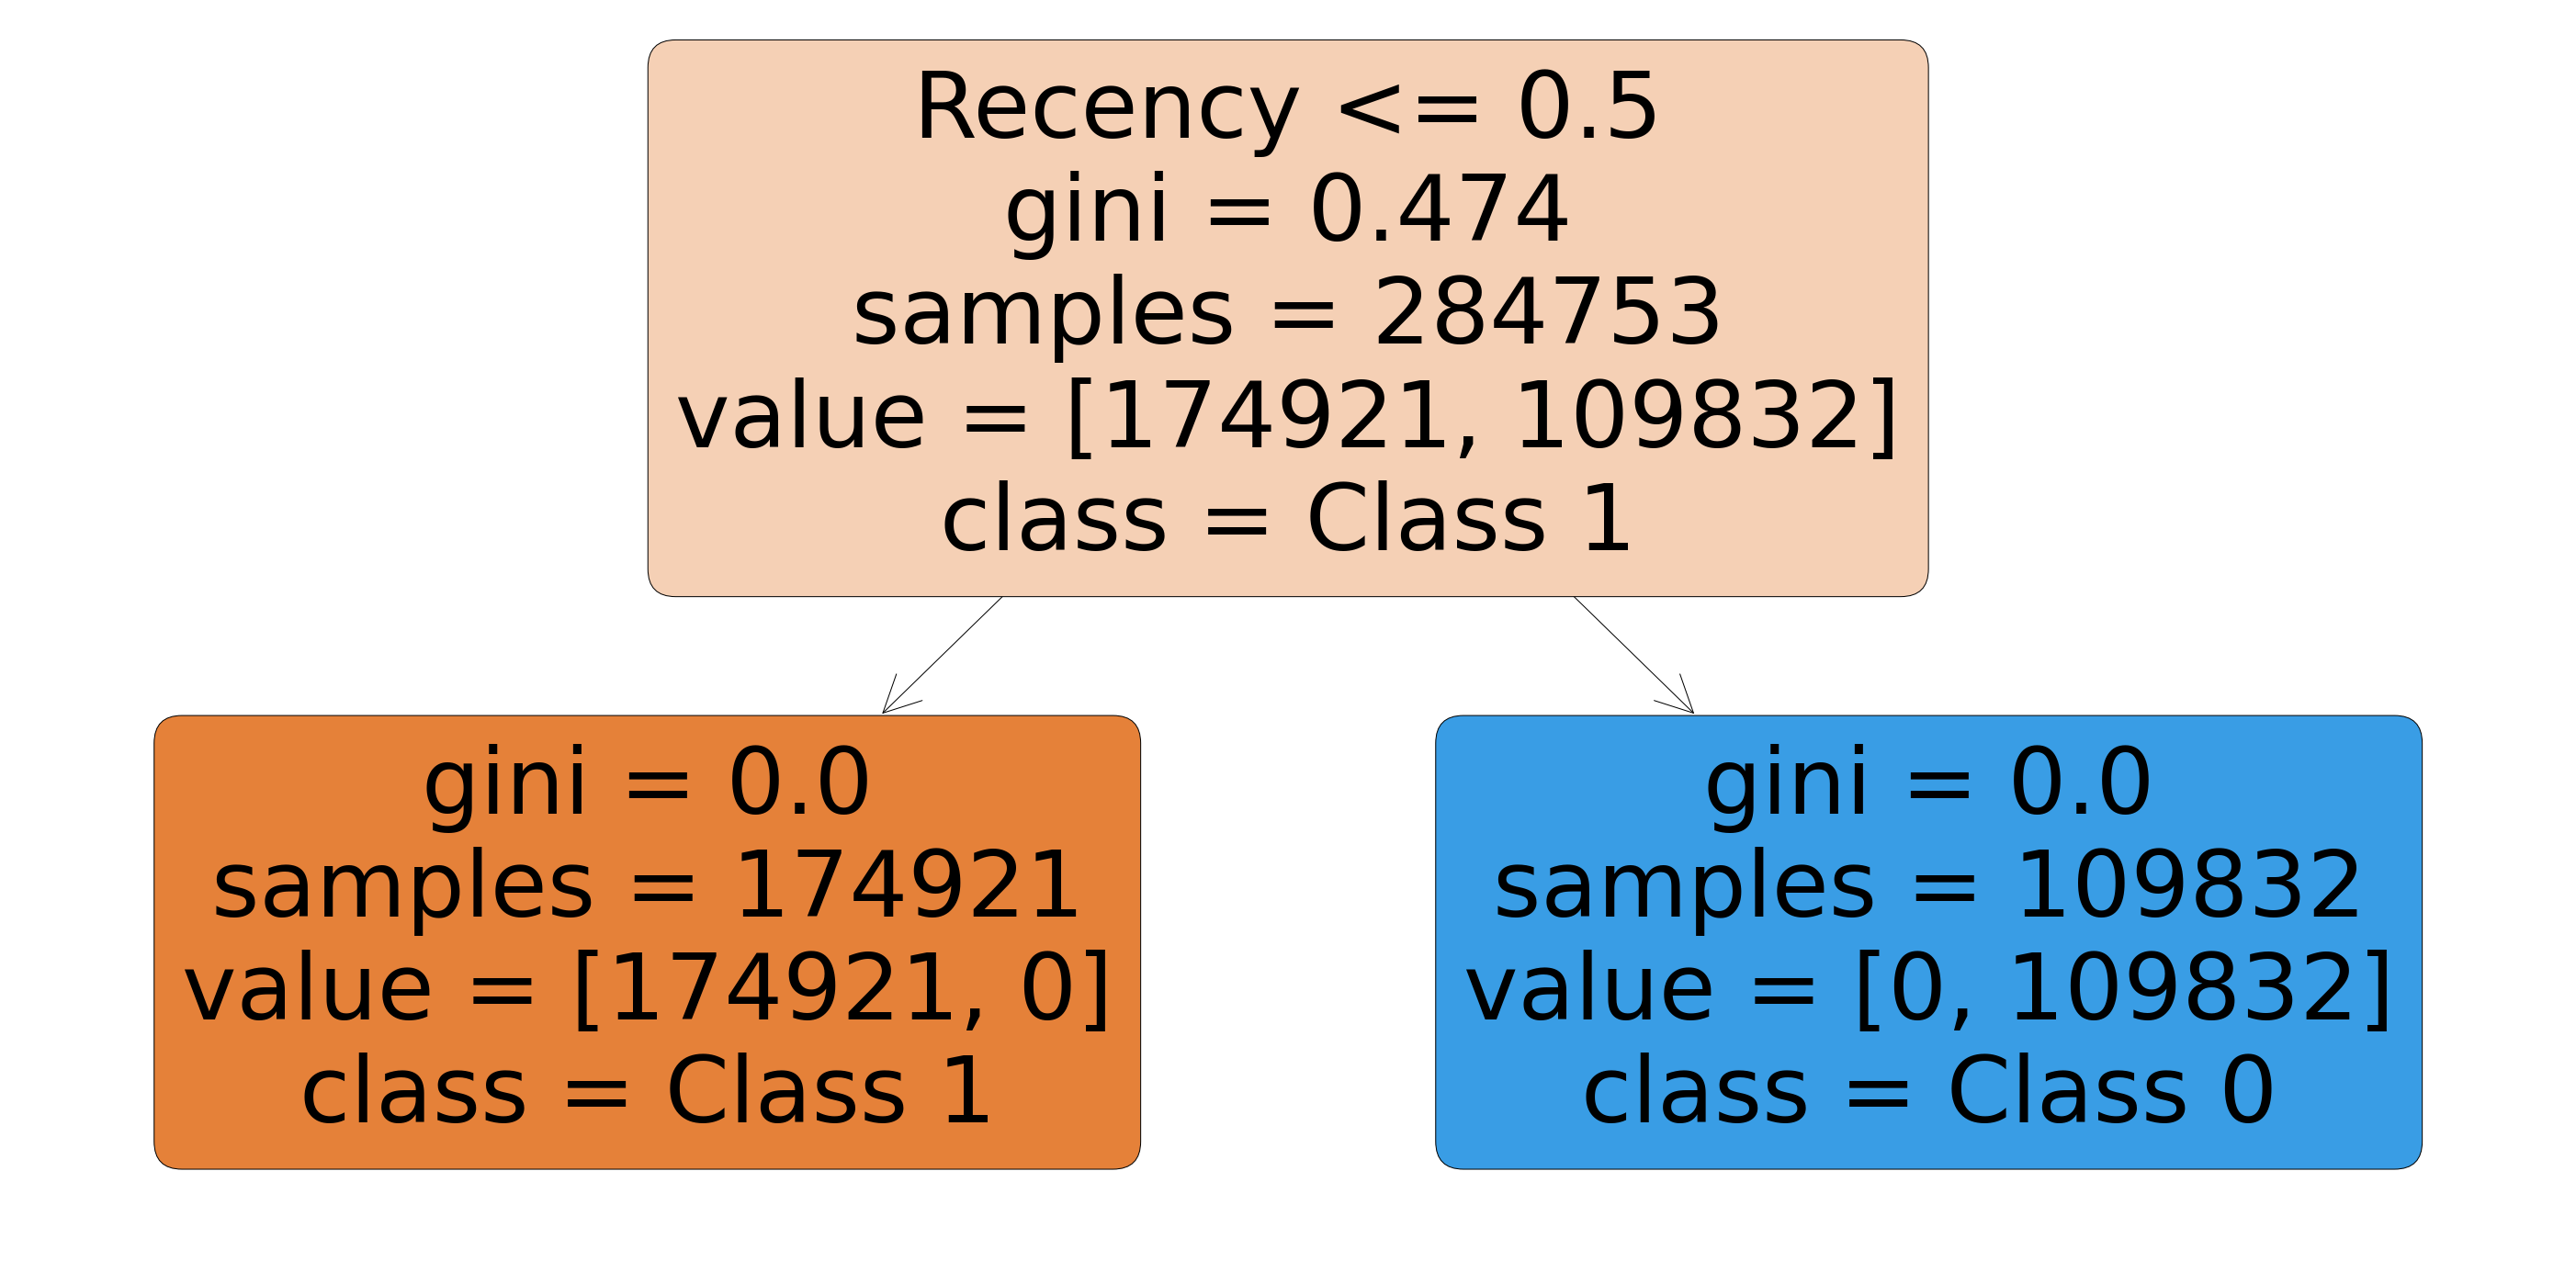

In [68]:
plt.figure(figsize=(50,25))
plot_tree(clf_dt,
          filled = True, 
          rounded = True, 
          class_names = ["Class 1", "Class 0"],  
          feature_names = [ "Recency", "Monetary", "lifespam", "clv", "score", "score_level"]);